In [11]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from skimage import *
import skimage
from skimage import io

In [3]:
!ls ./aggregation/

'41_2020-10-24 15.45.07.tif'	    '41_res_2020-10-24 15.49.27.tif'
'41_2020-10-24 15.45.28.tif'	    '41_res_2020-10-24 15.49.46.tif'
'41_2020-10-24 15.45.43.tif'	    'alh11_2020-10-24 15.46.21.tif'
'41_2020-10-24 15.45.54.tif'	    'alh11_2020-10-24 15.46.31.tif'
'41_2020-10-24 15.46.08.tif'	    'alh11_2020-10-24 15.46.42.tif'
'41_minus_2020-10-23 18.19.15.tif'  'alh11_2020-10-24 15.46.55.tif'
'41_res_2020-10-24 15.48.06.tif'    'alh11_2020-10-24 15.47.08.tif'
'41_res_2020-10-24 15.48.18.tif'    'alh11_2020-10-24 15.47.19.tif'
'41_res_2020-10-24 15.48.29.tif'    'alh11_2020-10-24 15.47.29.tif'
'41_res_2020-10-24 15.48.46.tif'    'alh11_2020-10-24 15.47.40.tif'
'41_res_2020-10-24 15.48.57.tif'    'alh11_2020-10-24 15.47.49.tif'
'41_res_2020-10-24 15.49.06.tif'    'N2_025_2020-08-21 19.39.27.tif'
'41_res_2020-10-24 15.49.17.tif'


In [64]:
plate = io.imread('./aggregation/41_2020-10-24 15.45.07.tif') #, as_gray= True

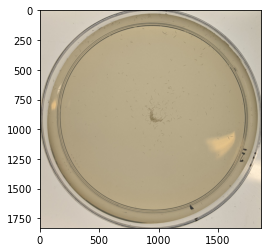

In [65]:
plt.imshow(plate);

In [28]:
def image_show(image, nrows=1, ncols=1, cmap='gray'):
    fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(14, 14))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    return fig, ax

# Segmentation

In [18]:
import skimage.data as data
import skimage.segmentation as seg
import skimage.filters as filters
import skimage.draw as draw
import skimage.color as color

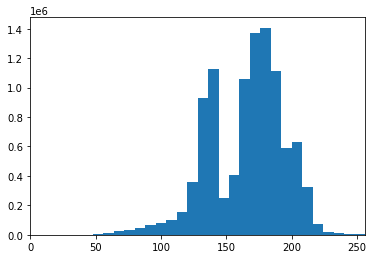

In [66]:
fig, ax = plt.subplots(1, 1)
ax.hist(plate.ravel(), bins=32, range=[0, 256])
ax.set_xlim(0, 256);

In [61]:
from skimage.filters import threshold_otsu
otsu_thresh = threshold_otsu(plate)
plate_otsu = plate < otsu_thresh

In [62]:
otsu_thresh

0.7056278615196079

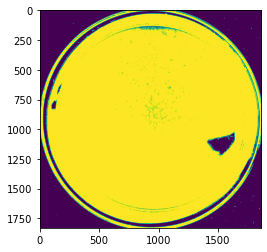

In [63]:
plt.imshow(plate_otsu);

In [44]:
image_slic = seg.slic(plate,n_segments=20_000)

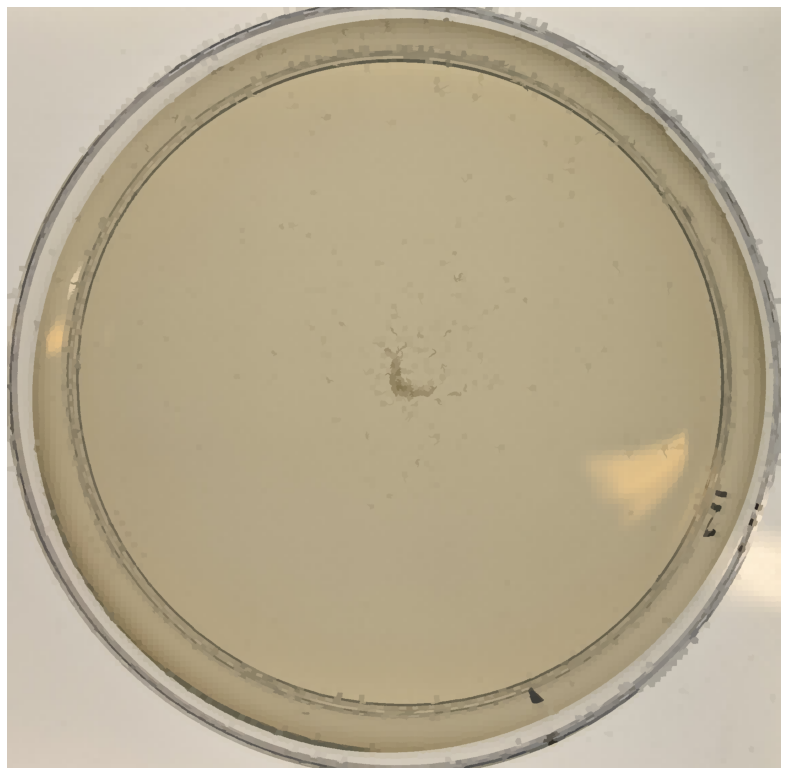

In [45]:
image_show(color.label2rgb(image_slic, plate, kind='avg'));

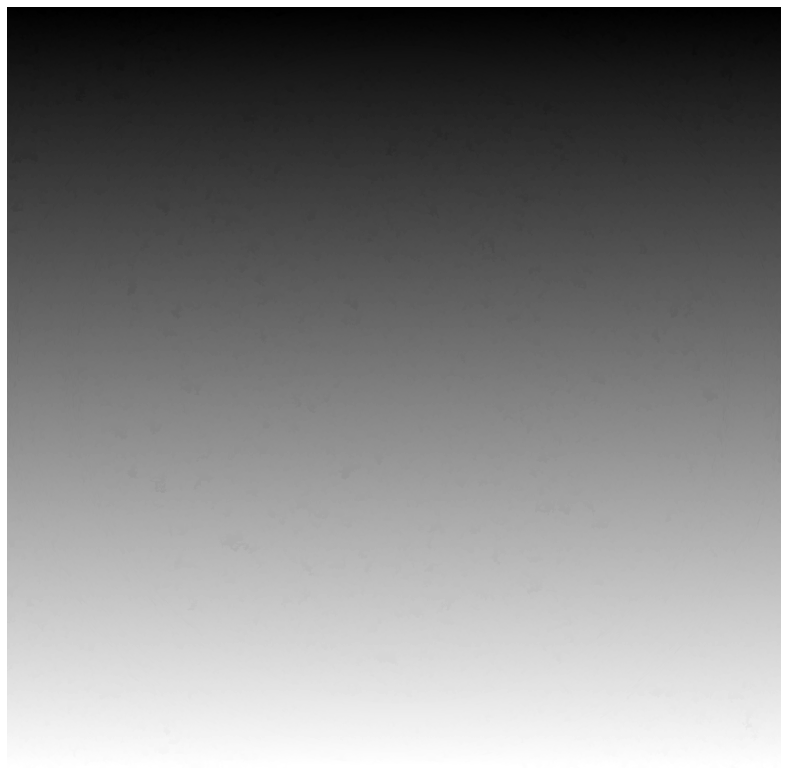

In [46]:
image_felzenszwalb = seg.felzenszwalb(plate, scale=1, sigma=0.2) 
image_show(image_felzenszwalb);

In [ ]:
image_watershed = seg.watershed(plate)